In [17]:
import pandas as pd
import re
from nltk.corpus import stopwords
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import pickle

In [2]:
df = pd.read_csv('../data/interim/en_fr_sp.csv', )
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [3]:
fr = df.query('Language == "French"')
fr.head()

,Text,Language
1385,Si vous disposez d'ouvrages ou d'articles de r...,French
1386,Comment ajouter mes sources ?,French
1387,Cette page ou section est en train d'être trad...,French
1388,Vous pouvez aider au développement de Wikipédi...,French
1389,Le mot nature est un terme polysémique (c’est-...,French


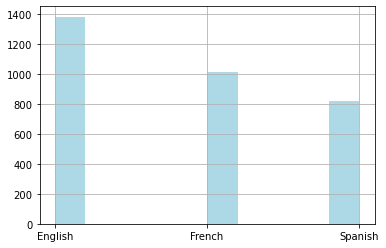

In [4]:
df.Language.hist(color = 'lightblue');

In [5]:
X = df["Text"]
y = df["Language"]

In [6]:
le = LabelEncoder()
y = le.fit_transform(y)

In [7]:
def clean_data(t_x):
    data_list = []
    for text in t_x:
        text = re.sub(r'[!@#$(),"%^*?:;~`0-9\[\]]', ' ', text)
        text = text.lower()
        data_list.append(text)
    return data_list
data_list = clean_data(X)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(data_list, y, test_size = 0.25)

In [15]:
len(x_test)

805

In [36]:
cv = CountVectorizer()
x_train = cv.fit_transform(x_train).toarray()
x_test = cv.transform(x_test).toarray()

In [10]:
clf = SVC()
clf.fit(x_train, y_train)
preds = clf.predict(x_test)

In [11]:
print('Accuracy of SVC is: ', accuracy_score(y_test, preds))
confusion_matrix(y_test, preds)

Accuracy of SVC is:  0.968944099378882


array([[339,   0,  11],
       [  0, 243,  13],
       [  1,   0, 198]])

In [37]:
nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)
y_pred = nb_model.predict(x_test)

In [38]:
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy of Naive Bayes is :",acc)
cm

Accuracy of Naive Bayes is : 0.9925465838509316


array([[362,   0,   1],
       [  1, 250,   0],
       [  3,   1, 187]])

In [39]:
param_grid = {'alpha' : [1.0, .9, .8, .7],
              'fit_prior' : [True, False]
             }
clf_grid = GridSearchCV(nb_model, param_grid, n_jobs=-1)
clf_grid = clf_grid.fit(x_train, y_train)
print(clf_grid.best_score_)
best = clf_grid.best_estimator_
print(best)

0.9929563671039408
MultinomialNB(fit_prior=False)


In [40]:
#save clf and vectorizer
with open('../models/cv_best_nb.pkl', 'wb') as fout:
    pickle.dump((cv, best), fout)

In [41]:
with open('../models/cv_best_nb.pkl', 'rb') as fin:
    vect, clf = pickle.load(fin)

In [32]:
#must get new x_test, y_test because it is already transfromed no need to fix
x = vect.transform(x_test)
new_preds = clf.predict(x)
accuracy_score(y_test, new_preds)

0.9937888198757764